In [1]:
include("sebastien.jl")
using Main.WeirdDetector
using PyPlot
using DataFrames

In [2]:
#analysis of TIC173077938, true period = 0.6484
tic_id = "173077938"
df = loadFITS(0, fitsdir="173077938/", tic_id=tic_id, detrend_kw=1)
d = pointsify(df)

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #loadFITS#29(::Bool, ::Int64, ::Int64, ::Bool, ::Int64, ::String, ::Bool, ::Int64, ::Float64, ::Bool, ::typeof(Statistics.median), ::UnitRange{Int64}, ::String, ::Bool, ::String, ::Bool, ::typeof(loadFITS), ::String) at sebastien.jl:384
└ @ Main.WeirdDetector C:\Users\Joheen\Documents\Research\TESS_data_analysis-master\TESS_data_analysis-master\sebastien.jl:384
┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller = #loadFITS#29(::Bool, ::Int64, ::Int64, ::Bool, ::Int64, ::String, ::Bool, ::Int64, ::Float64, ::Bool, ::typeof(Statistics.median), ::UnitRange{Int64}, ::String, ::Bool, ::String, ::Bool, ::typeof(loadFITS), ::String) at sebastien.jl:390
└ @ Main.WeirdDetector C:\Users\Joheen\Documents\Research\TESS_data_analysis-master\TESS_data_analysis-master\sebastien

16165-element Array{Point,1}:
 Point(1491.6772f0, NaN32, -0.00033569336f0, 0.00040409234f0, NaN32)
 Point(1491.6786f0, NaN32, -0.00010859966f0, 0.00040407685f0, NaN32)
 Point(1491.68f0, NaN32, -0.00065368414f0, 0.0004039395f0, NaN32)   
 Point(1491.6814f0, NaN32, 0.00023007393f0, 0.00040400357f0, NaN32) 
 Point(1491.6827f0, NaN32, 0.00019431114f0, 0.00040410645f0, NaN32) 
 Point(1491.6842f0, NaN32, -0.00026917458f0, 0.000404197f0, NaN32)  
 Point(1491.6855f0, NaN32, 0.00014185905f0, 0.00040428023f0, NaN32) 
 Point(1491.6869f0, NaN32, 0.0003569126f0, 0.00040416626f0, NaN32)  
 Point(1491.6884f0, NaN32, -0.00015646219f0, 0.000404006f0, NaN32)  
 Point(1491.6897f0, NaN32, -0.000197649f0, 0.00040383136f0, NaN32)  
 Point(1491.6912f0, NaN32, -0.00063079596f0, 0.00040392182f0, NaN32)
 Point(1491.6925f0, NaN32, 0.00048089027f0, 0.00040404956f0, NaN32) 
 Point(1491.6938f0, NaN32, 8.523464f-5, 0.00040394848f0, NaN32)     
 ⋮                                                                  
 Poi

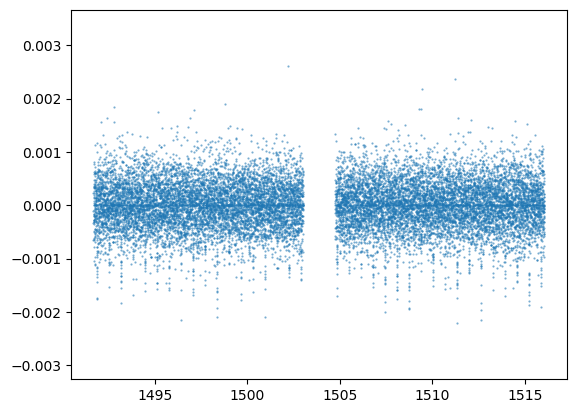

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1


PyObject <matplotlib.collections.PathCollection object at 0x0000000046D05D88>

In [3]:
scatter(df[:t], df[:F], alpha=0.6, s=0.3)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1


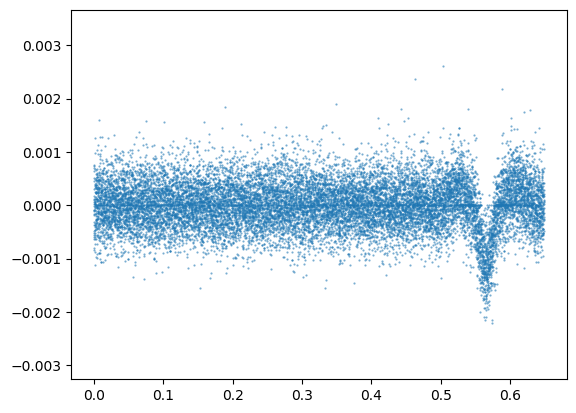

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1


PyObject <matplotlib.collections.PathCollection object at 0x0000000002391208>

In [4]:
scatter(df[:t] .% 0.6484, df[:F], alpha=0.6, s=0.3)

In [6]:
periods = optimal_periods(0.25, 15)
output = periodogram(d, periods, parallel=true, datakw=true)

,chi2,kurtosis
,Float32,Float32
1,20761.4,2.80188
2,20694.5,2.99365
3,20783.2,2.85846
4,20510.1,2.843
5,20765.2,2.95033
6,20932.9,3.25952
7,20745.1,2.92256
8,20754.7,3.09107
9,20851.8,2.76115


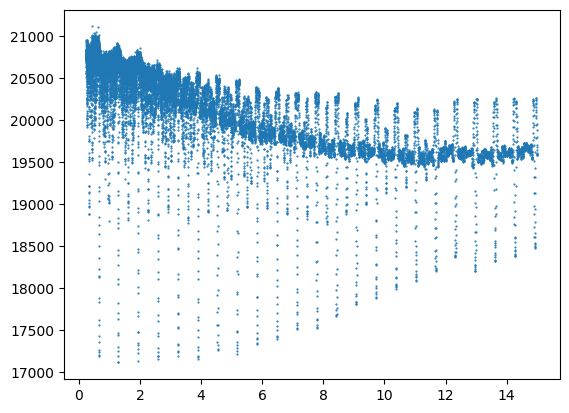

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:1
└ @ Core In[35]:1


PyObject <matplotlib.collections.PathCollection object at 0x0000000052D9C188>

In [35]:
scatter(periods, output[:chi2], s=0.3)

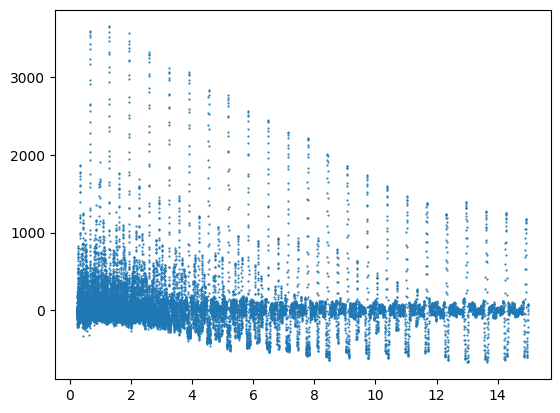

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[111]:1
└ @ Core In[111]:1


PyObject <matplotlib.collections.PathCollection object at 0x000000005DAA2D08>

In [111]:
scatter(periods, localdec(output[:chi2]), s=0.3)

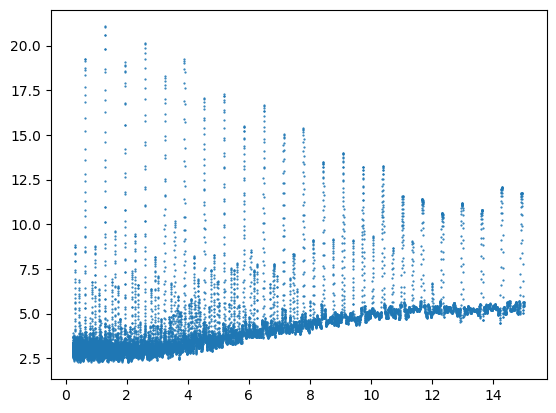

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[36]:1
└ @ Core In[36]:1


PyObject <matplotlib.collections.PathCollection object at 0x00000000578E60C8>

In [36]:
scatter(periods, output[:kurtosis], s=0.3)

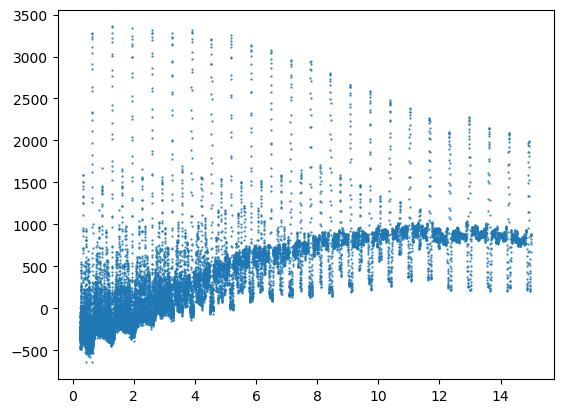

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[37]:1
└ @ Core In[37]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[37]:1
└ @ Core In[37]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[37]:2
└ @ Core In[37]:2


PyObject <matplotlib.collections.PathCollection object at 0x0000000057A854C8>

In [37]:
output[:delt_chi2] = Main.WeirdDetector.flatten(periods, output[:chi2], tess=true)
scatter(periods, output[:delt_chi2], s=0.3)

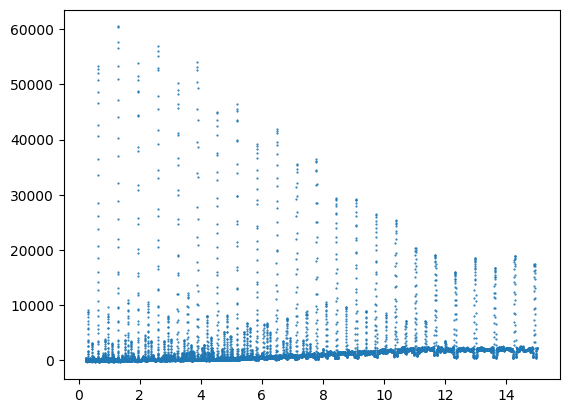

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[122]:1
└ @ Core In[122]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[122]:1
└ @ Core In[122]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[122]:1
└ @ Core In[122]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[122]:2
└ @ Core In[122]:2


PyObject <matplotlib.collections.PathCollection object at 0x000000005EC03108>

In [122]:
output[:zetaprime] = (output[:kurtosis] .-3 ) .* output[:delt_chi2]
scatter(periods, output[:zetaprime], s=0.3)
# periods[findall(a->a==maximum(output[:zetaprime]), output[:zetaprime])][1]

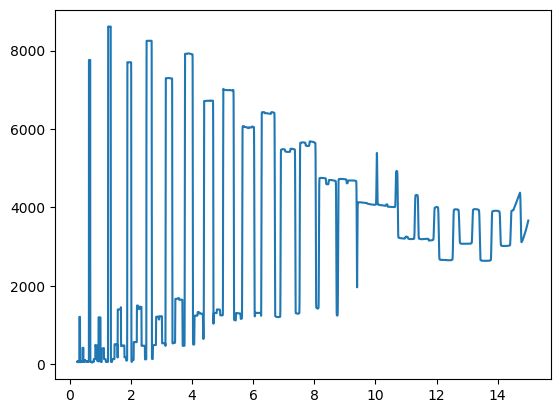

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[96]:1
└ @ Core In[96]:1


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005C762508>

In [96]:
plot(periods, movingstd(output[:zetaprime]))

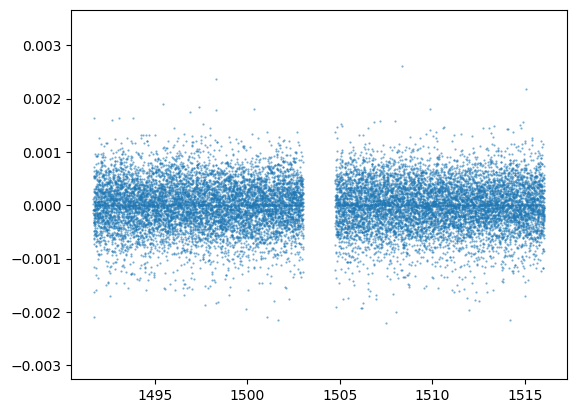

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[131]:7
└ @ Core In[131]:7
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[131]:7
└ @ Core In[131]:7


PyObject <matplotlib.collections.PathCollection object at 0x000000005F200748>

In [131]:
using Random
scrambled = deepcopy(df)
rand = Random.randperm(size(scrambled)[1])
scrambled.F = scrambled[rand, :F]
scrambled.sigmaF = scrambled[rand, :sigmaF]
scrambled.interpolated = scrambled[rand, :interpolated]
scatter(scrambled[:t], scrambled[:F], alpha=0.6, s=0.3)

In [132]:
null_output1 = periodogram(pointsify(scrambled), periods, parallel=true, datakw=true)

,chi2,kurtosis
,Float32,Float32
1,20704.4,3.01321
2,20725.2,3.18673
3,20737.1,3.01495
4,20787.5,2.82847
5,20740.9,2.82593
6,20636.1,3.18012
7,20752.5,3.1534
8,20756.7,2.90222
9,20746.7,2.84164


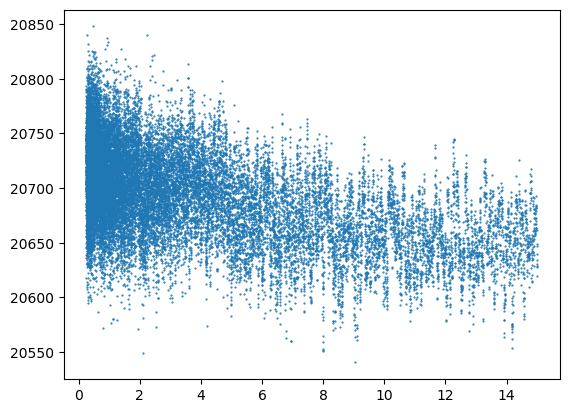

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[133]:1
└ @ Core In[133]:1


PyObject <matplotlib.collections.PathCollection object at 0x000000005F255A88>

In [133]:
scatter(periods, null_output1[:chi2], s=0.3)

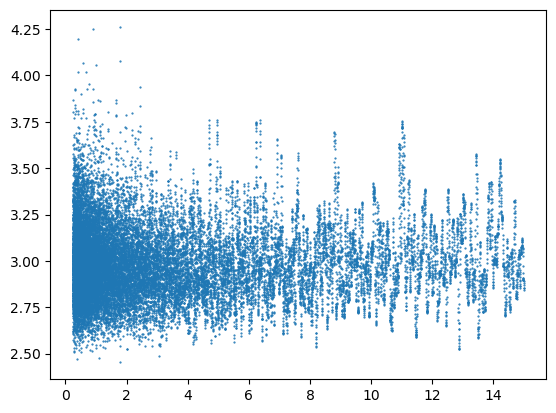

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[134]:1
└ @ Core In[134]:1


PyObject <matplotlib.collections.PathCollection object at 0x000000005EEDF548>

In [134]:
scatter(periods, null_output1[:kurtosis], s=0.3)

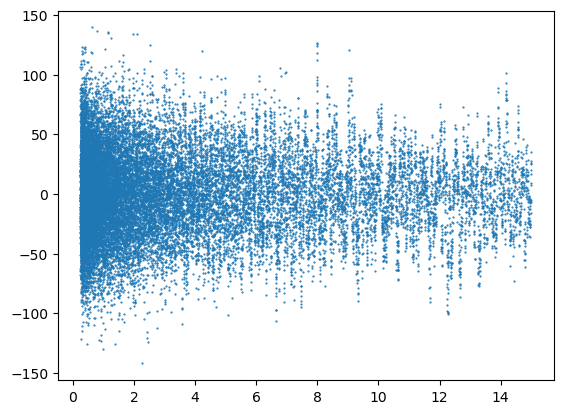

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[135]:12
└ @ Core In[135]:12
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[135]:12
└ @ Core In[135]:12
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[135]:13
└ @ Core In[135]:13


PyObject <matplotlib.collections.PathCollection object at 0x000000005F2B7C48>

In [135]:
using Statistics
function localdec(chi2::Vector{Float32}, kw=200) :: Vector{Float32}
    delt = similar(chi2)
    for i in 1:length(chi2)
        lb = i - kw < 1 ? 1 : i - kw
        ub = i + kw > length(chi2) ? length(chi2) : i + kw
        med = median(chi2[lb:ub])
        delt[i] = med - chi2[i]
    end
    delt
end
null_output1[:delt_chi2] = localdec(null_output1[:chi2])
scatter(periods, null_output1[:delt_chi2], s=0.3)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[136]:1
└ @ Core In[136]:1


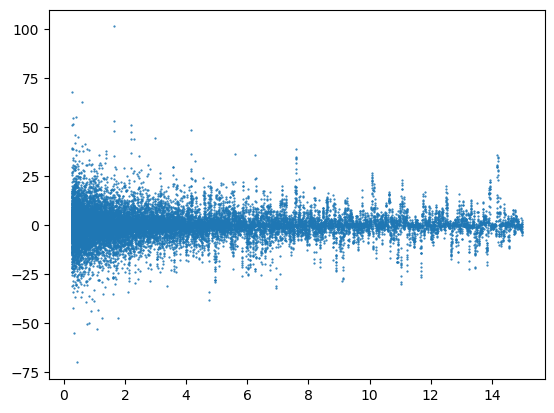

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[136]:1
└ @ Core In[136]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[136]:1
└ @ Core In[136]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[136]:2
└ @ Core In[136]:2


PyObject <matplotlib.collections.PathCollection object at 0x000000006047C188>

In [136]:
null_output1[:zetaprime] = (null_output1[:kurtosis] .- 3) .* null_output1[:delt_chi2]
scatter(periods, null_output1[:zetaprime], s=0.3)

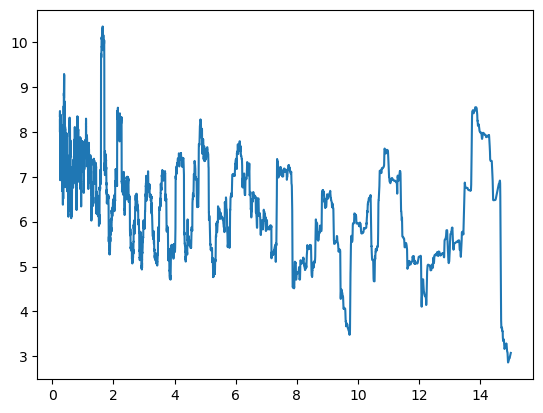

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[137]:1
└ @ Core In[137]:1


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000060355F88>

In [137]:
sigma1 = movingstd(null_output1[:zetaprime])
plot(periods, sigma1)

In [138]:
using Statistics
null_output[:delt_chi2] = Main.WeirdDetector.flatten(periods, null_output[:chi2], tess=true)
null_output[:zetaprime] = (null_output[:kurtosis] .- 3) .* null_output[:delt_chi2]

function mstd(npowers::Vector{Float32}, kw=200) :: Vector{Float32}
    sigmas = similar(npowers)
    for i in 1:length(npowers)
        lb = i - kw < 1 ? 1 : i - kw
        ub = i + kw > length(npowers) ? length(npowers) : i + kw
        sigmas[i] = Statistics.std(npowers[lb:ub])
    end
    sigmas
end
sigma = movingstd(null_output[:zetaprime])
plot(periods, sigma)

UndefVarError: UndefVarError: null_output not defined

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[139]:1
└ @ Core In[139]:1


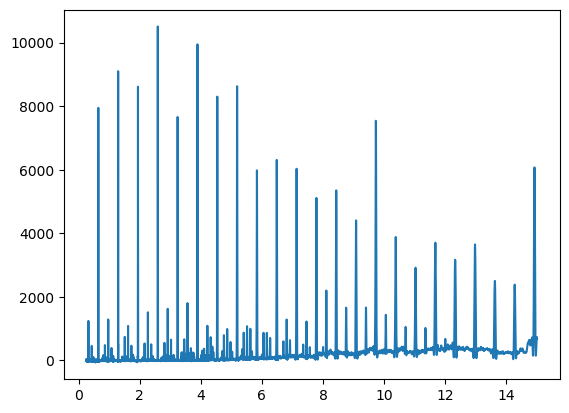

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[139]:2
└ @ Core In[139]:2
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[139]:2
└ @ Core In[139]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[139]:3
└ @ Core In[139]:3


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000603C80C8>

In [139]:
sigma = movingstd(null_output1[:zetaprime])
output[:zeta] = output[:zetaprime] ./ sigma
plot(periods, output[:zeta])

In [38]:
periods[findall(a->a==maximum(output[:zeta]), output[:zeta])][1]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[38]:1
└ @ Core In[38]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = (::getfield(Main, Symbol("##5#6")))(::Float32) at In[38]:1
└ @ Main .\In[38]:1


1.9455391f0